In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("./DATA/train.csv")
test = pd.read_csv("./DATA/test.csv")

In [3]:
plt.style.use("seaborn")
sns.set(font_scale=2.5)
plt.rc('font', family='Malgun Gothic')

In [4]:
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 데이터가 어떻게 되어있나 볼 수 는 있지만 이것만 가지고는 아직 감이 안온다.

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### null 데이터의 비율을 확인해보면서 어떤식으로 접근해가야할지 생각해보자

In [6]:
for col in test.columns:
    msg = ("{:>10}\t Percent of NaN value: {:.2f}%".format(col, 100*(test[col].isnull().sum() / test[col].shape[0])))
    print(msg)

PassengerId	 Percent of NaN value: 0.00%
    Pclass	 Percent of NaN value: 0.00%
      Name	 Percent of NaN value: 0.00%
       Sex	 Percent of NaN value: 0.00%
       Age	 Percent of NaN value: 20.57%
     SibSp	 Percent of NaN value: 0.00%
     Parch	 Percent of NaN value: 0.00%
    Ticket	 Percent of NaN value: 0.00%
      Fare	 Percent of NaN value: 0.24%
     Cabin	 Percent of NaN value: 78.23%
  Embarked	 Percent of NaN value: 0.00%


# null 데이터를 시각화
### 시각화를 함으로써 한눈에 볼 수 있다.

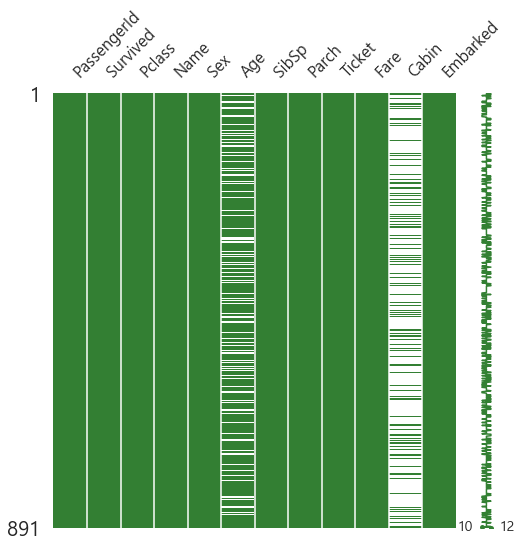

In [7]:
msno.matrix(df=train.iloc[:, :], figsize=(8,8), color=(0.2, 0.5, 0.2))

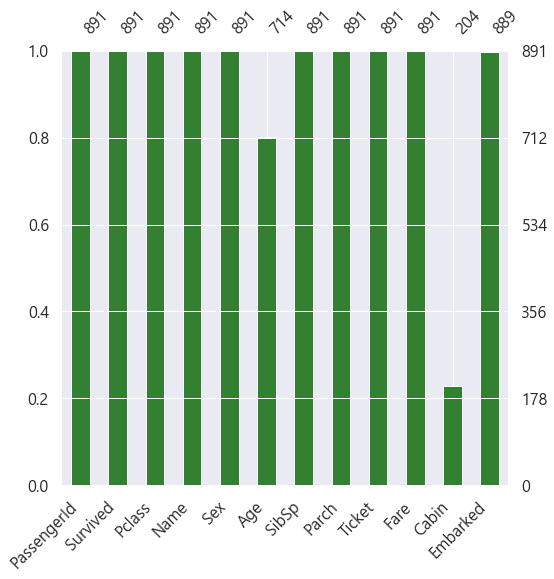

In [8]:
msno.bar(df=train.iloc[:, :], figsize=(8,8), color=(0.2, 0.5, 0.2))

# EDA

In [9]:
print(train[train['Survived']==0]['Survived'].count())
print(train[train['Survived']==1]['Survived'].count())

549
342


Text(0.5, 1.0, 'Count plot - Survived')

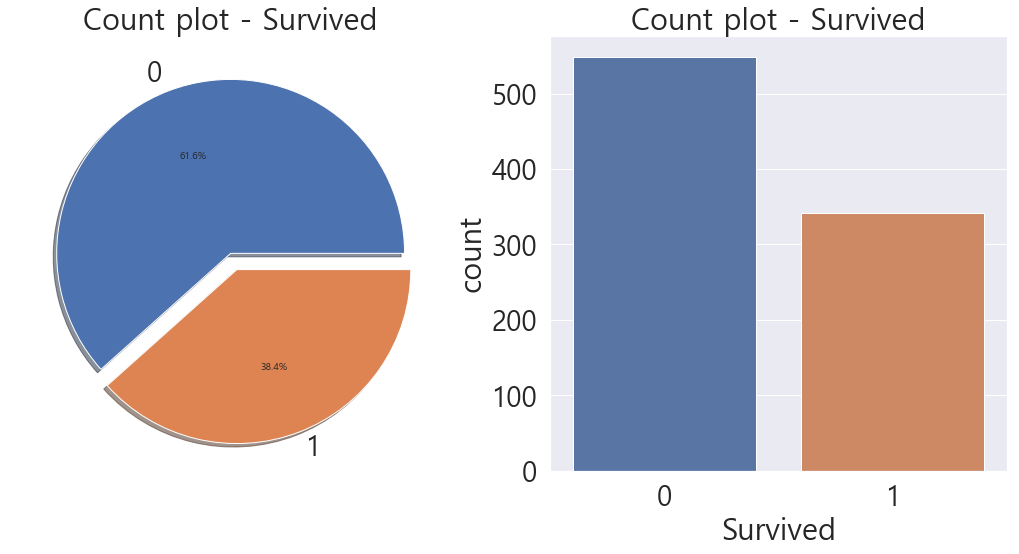

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18,  8))

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_ylabel('')
ax[0].set_title('Count plot - Survived')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

# Pclass

In [11]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


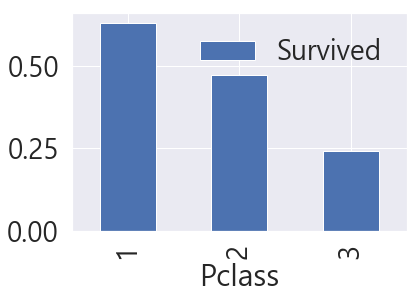

In [13]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

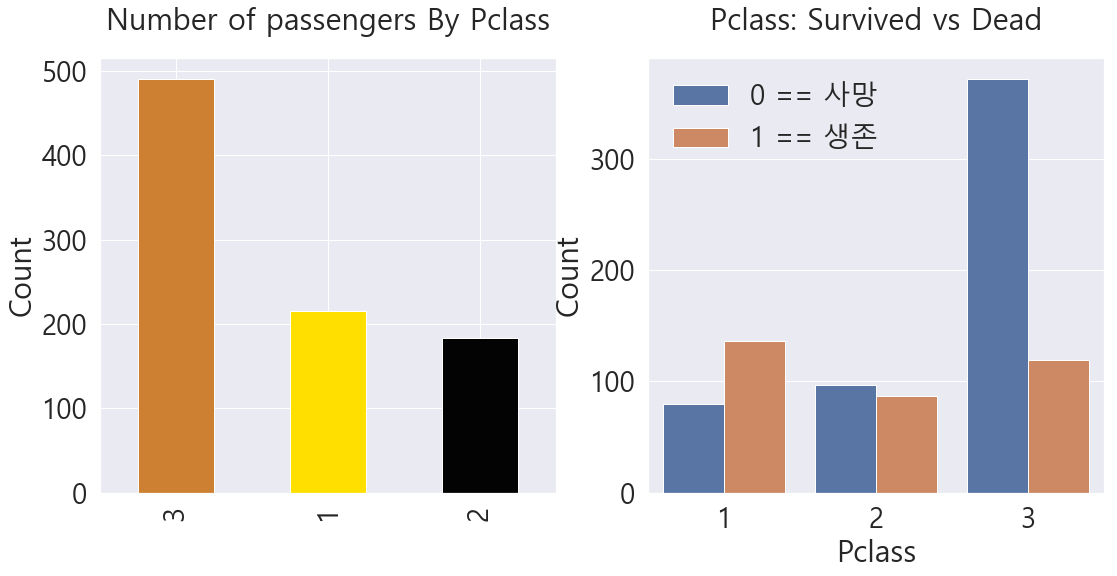

In [14]:
y_position = 1.05
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#030303'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
ax[1].set_ylabel('Count')
plt.legend(['0 == 사망','1 == 생존'])

# Age

In [15]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(train['Age'].max()))
print('제일 어린 탑승객 : {:>9.1f} Years'.format(train['Age'].min()))
print('탑승객 평균 나이 : {:>9.1f} Years'.format(train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 :       0.4 Years
탑승객 평균 나이 :      29.7 Years


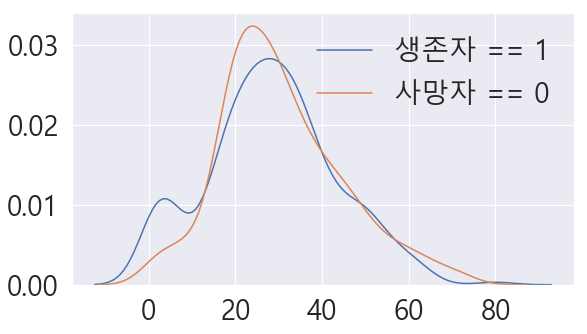

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train['Survived'] ==1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] ==0]['Age'], ax=ax)
plt.legend(['생존자 == 1', '사망자 == 0'])

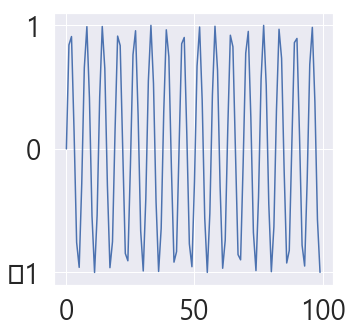

In [17]:
# f = plt.figure(figsize=(10,10))
f, ax = plt.subplots(1, 1, figsize=(5,5))
a = np.arange(100)
b = np.sin(a)
ax.plot(b)

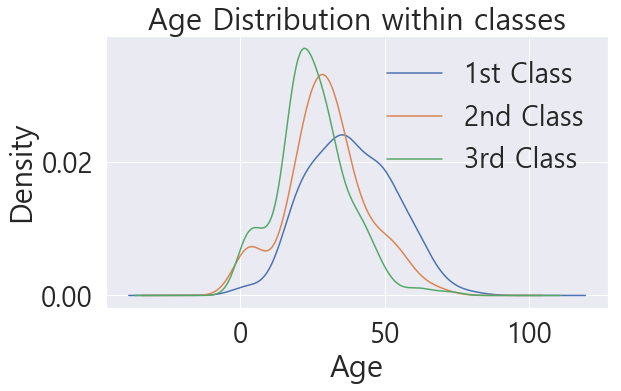

In [18]:
plt.figure(figsize=(9,5))
train['Age'][train['Pclass']==1].plot(kind='kde')
train['Age'][train['Pclass']==2].plot(kind='kde')
train['Age'][train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class', '3rd Class'])

# 1객실 나이별 생사

In [19]:
train[(train['Survived']) == 0 & (train['Pclass']==1)]['Age'].mean()

30.62617924528302

Text(0.5, 1.0, '1st class')

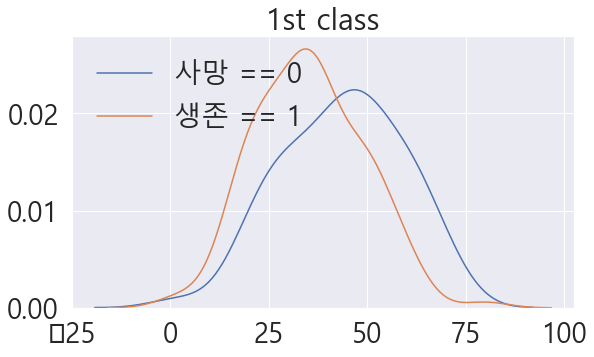

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[(train['Survived'] == 0) & (train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(train[(train['Survived'] == 1) & (train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['사망 == 0', '생존 == 1'])
plt.title('1st class')

# 2객실 나이별 생사

Text(0.5, 1.0, '2nd class')

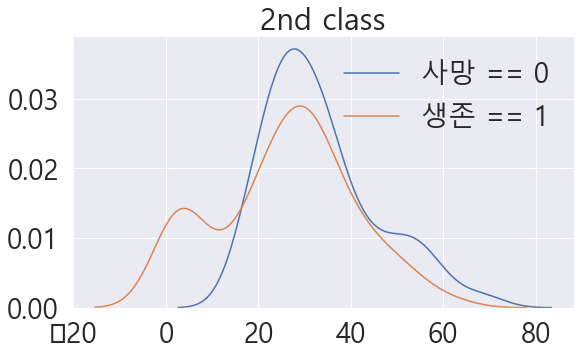

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[(train['Survived'] == 0) & (train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(train[(train['Survived'] == 1) & (train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['사망 == 0', '생존 == 1'])
plt.title('2nd class')

# 3객실 나이별 생사

Text(0.5, 1.0, '3rd class')

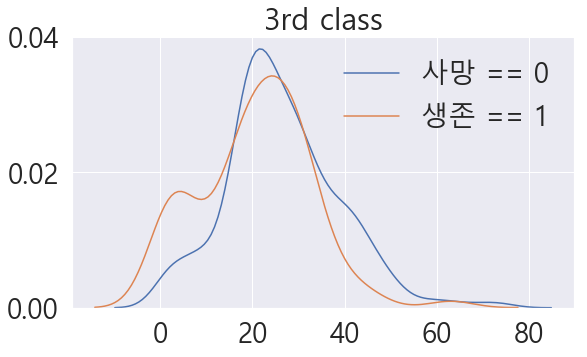

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[(train['Survived'] == 0) & (train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(train[(train['Survived'] == 1) & (train['Pclass'] == 3)]['Age'], ax=ax)
plt.legend(['사망 == 0', '생존 == 1'])
plt.title('3rd class')

## 어린친구들이 정말 생존률이 높은가?

In [23]:
train[train['Age'] < 9]['Survived'].sum() / len(train[train['Age'] < 9]['Survived'])

0.6666666666666666

Text(0.5, 0, 'Range of Age(0~x)')

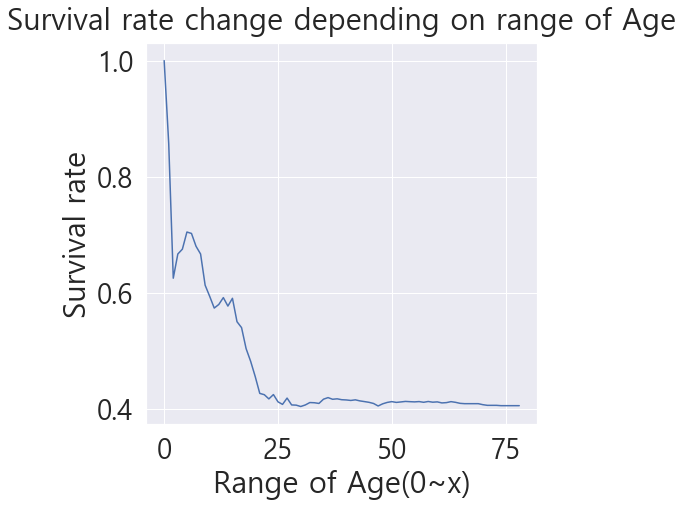

In [24]:
change_age_range_survival_ratio = []

for i in range(1, 80):
    change_age_range_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

# Pclass, Sex, Age 한번에 보기

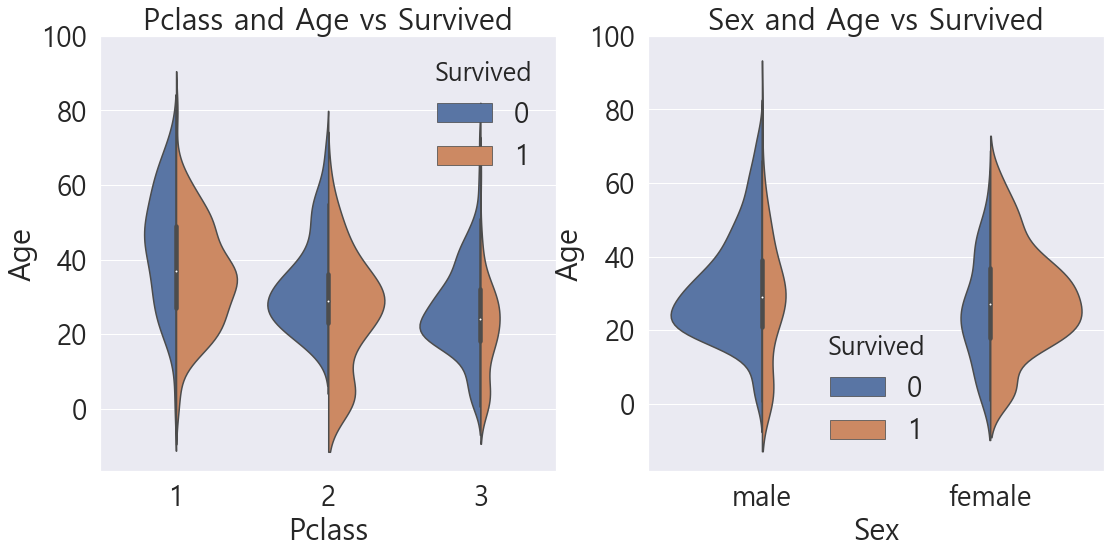

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 20))

sns.violinplot('Sex', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 20))

## Embarked

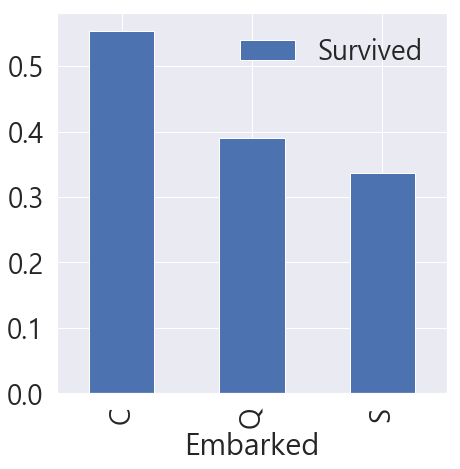

In [26]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

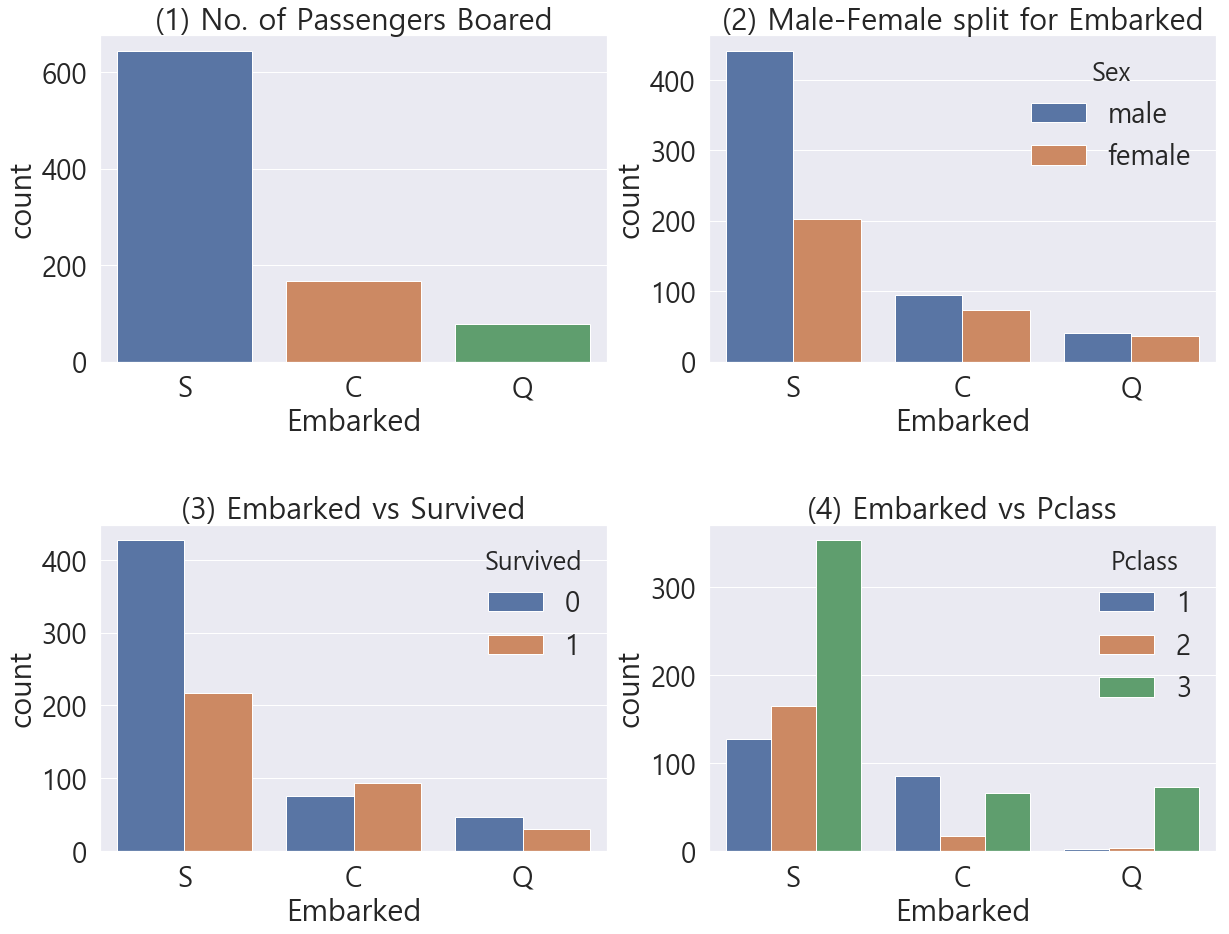

In [27]:
f, ax =plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boared')

sns.countplot('Embarked', hue='Sex', data=train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female split for Embarked')

sns.countplot('Embarked', hue='Survived', data=train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Family -SibSp + Parch

In [28]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [29]:
# print('가장 가족단위가 큰 사람 :', train['FamilySize'].max())
# print('가장 가족이단위가 적은사람:{}', train['FamilySize'].min())

print('가장 가족이큰사람 :{:>10}'.format(train['FamilySize'].max()))
print('가장 가족이적은사람 :{:>7}'.format(train['FamilySize'].min()))

가장 가족이큰사람 :        11
가장 가족이적은사람 :      1


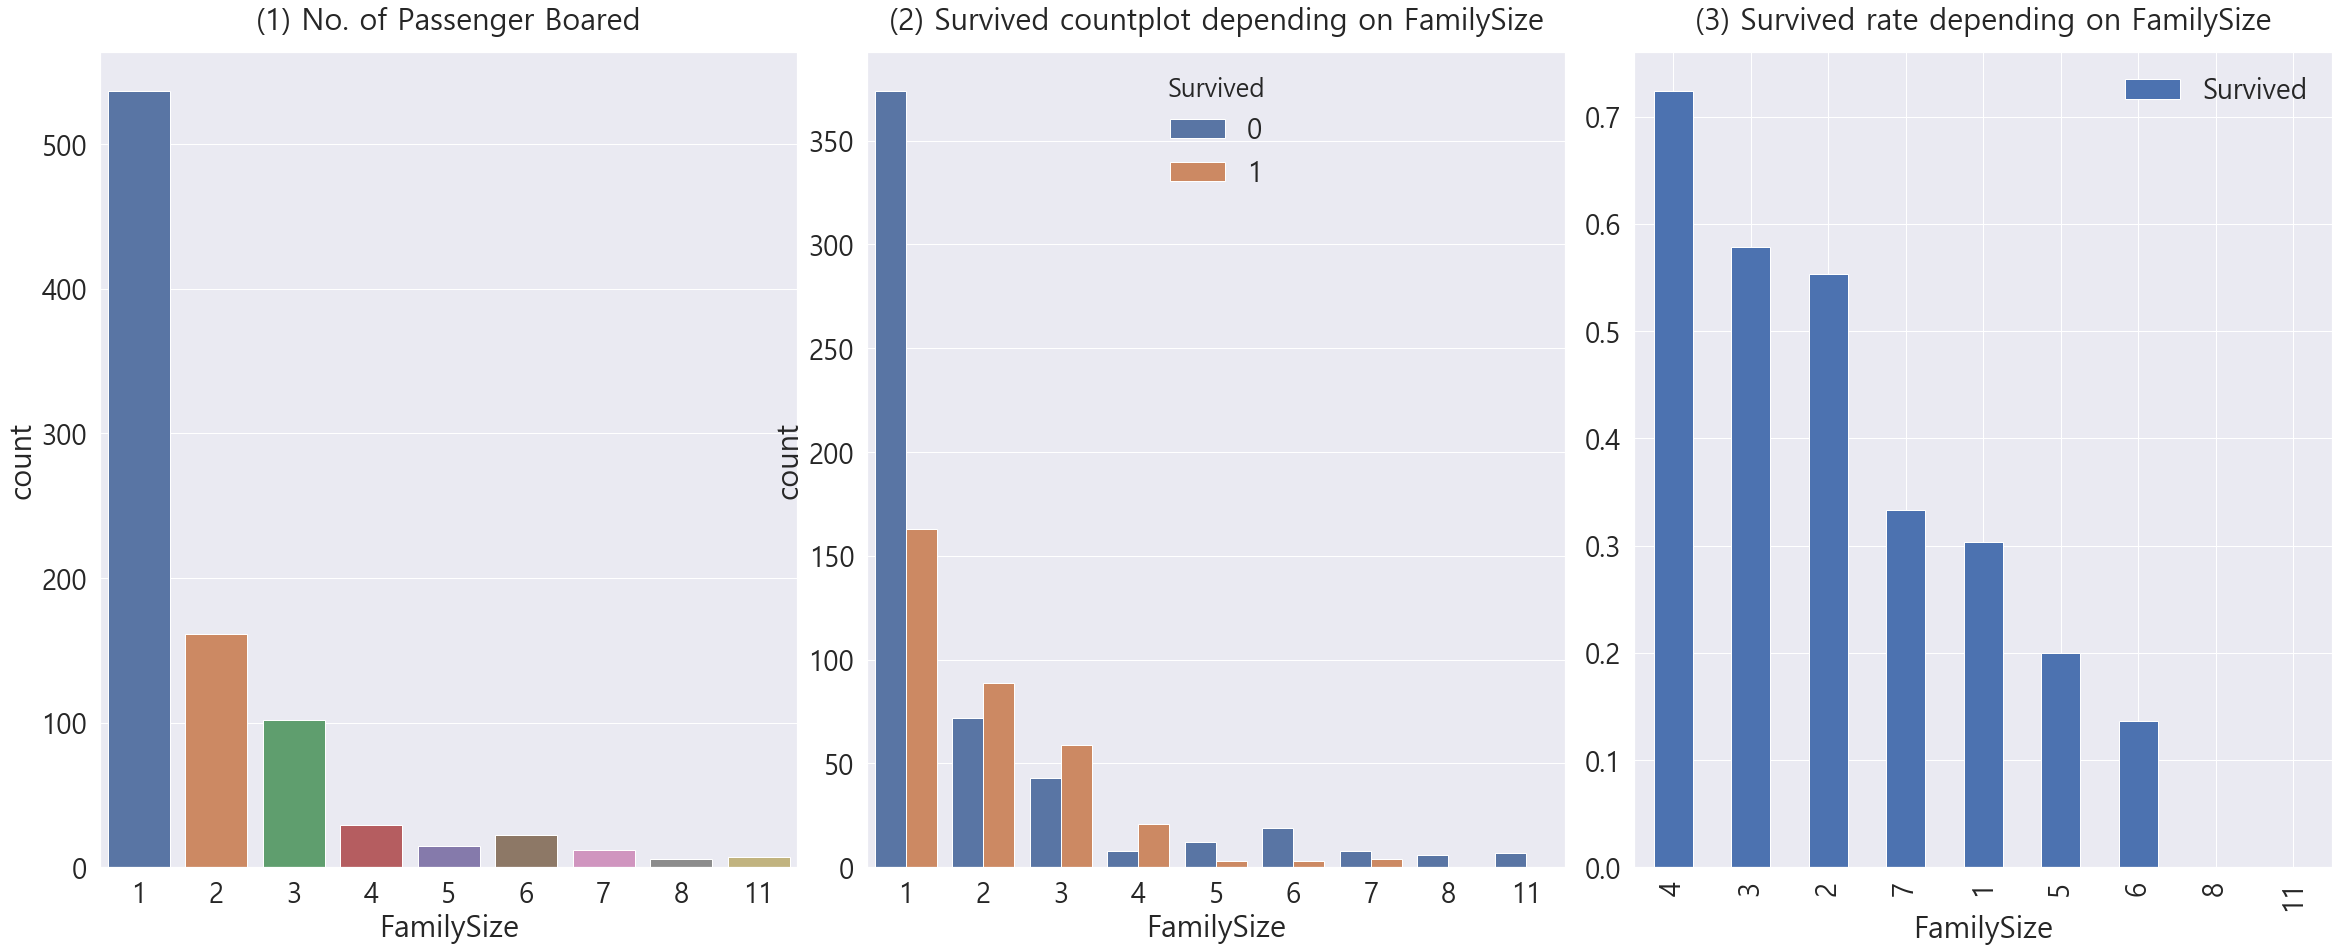

In [30]:
f, ax = plt.subplots(1, 3, figsize=(40,15))
sns.countplot('FamilySize', data=train, ax=ax[0])
ax[0].set_title('(1) No. of Passenger Boared', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.1, hspace=0.5)

# Fare

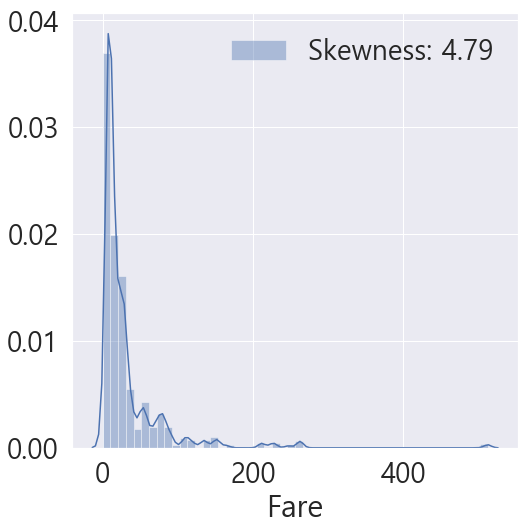

In [31]:
f , ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(train['Fare'], color='b', label='Skewness: {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### skewness를 0에 가깝게 만들기 (이유: 학습이 잘못될수가있어서)
#### 이것은 피쳐엔지니어링 이라고 한다.

In [32]:
train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i>0 else 0)

## Feature Engineering

In [33]:
train['Initial'] = train['Name'].str.extract('([A-Za-z]+)\.')
test['Initial'] = test['Name'].str.extract('([A-Za-z]+)\.')

In [34]:
train['Initial']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Initial, Length: 891, dtype: object

In [35]:
train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)
test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

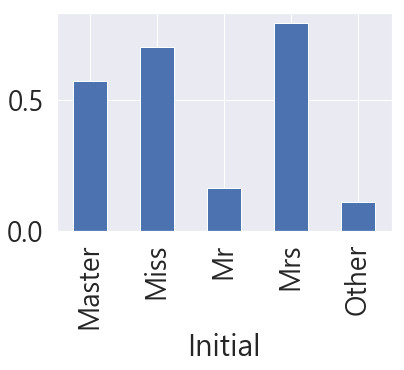

In [39]:
train.groupby('Initial')['Survived'].mean().plot.bar()

In [37]:
df_all = pd.concat([train, test])

In [38]:
df_all.groupby('Initial').mean()
# df_all.groupby('Age').mean()

,Age,FamilySize,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Initial,,,,,,,,
Master,5.482642,4.426230,15.442677,1.377049,658.852459,2.655738,2.049180,0.575000
Miss,21.834533,2.147170,14.021188,0.494340,616.992453,2.332075,0.652830,0.704301
Mr,32.556397,1.446174,10.003941,0.159533,658.831388,2.359274,0.286641,0.162571
Mrs,37.034884,2.482412,23.896996,0.824121,685.673367,1.929648,0.658291,0.795276
Other,44.923077,1.384615,24.523034,0.153846,714.923077,1.615385,0.230769,0.111111


In [40]:
train.loc[(train['Age'].isnull()) & (train['Initial'] == 'Mr'),'Age'] = 33
train.loc[(train['Age'].isnull()) & (train['Initial'] == 'Mrs'), 'Age'] = 37
train.loc[(train['Age'].isnull()) & (train['Initial'] == 'Master'), 'Age'] = 6
train.loc[(train['Age'].isnull()) & (train['Initial'] == 'Miss'), 'Age'] = 22
train.loc[(train['Age'].isnull()) & (train['Initial'] == 'Other'), 'Age'] = 45

In [41]:
test.loc[(test['Age'].isnull()) & (test['Initial'] == 'Mr'),'Age'] = 33
test.loc[(test['Age'].isnull()) & (test['Initial'] == 'Mrs'), 'Age'] = 37
test.loc[(test['Age'].isnull()) & (test['Initial'] == 'Master'), 'Age'] = 6
test.loc[(test['Age'].isnull()) & (test['Initial'] == 'Miss'), 'Age'] = 22
test.loc[(test['Age'].isnull()) & (test['Initial'] == 'Other'), 'Age'] = 45

In [42]:
train['Age'].isnull().sum()

0

# Embarked

In [43]:
train['Embarked'].isnull().sum()

2

In [44]:
train['Embarked'].fillna('S', inplace=True) # 결측치를 S로 채우기

In [45]:
train['Embarked'].isnull().sum()

0

In [42]:
train['Age_cat'] = 0

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


## Age 카테고리화 하드코딩

In [47]:
train.loc[train['Age'] < 10, 'Age_cat'] = 0
train.loc[(10 <= train['Age']) & (train['Age'] < 20), 'Age_cat'] = 1
train.loc[(20 <= train['Age']) & (train['Age'] < 30), 'Age_cat'] = 2
train.loc[(30 <= train['Age']) & (train['Age'] < 40), 'Age_cat'] = 3
train.loc[(40 <= train['Age']) & (train['Age'] < 50), 'Age_cat'] = 4
train.loc[(50 <= train['Age']) & (train['Age'] < 60), 'Age_cat'] = 5
train.loc[(60 <= train['Age']) & (train['Age'] < 70), 'Age_cat'] = 6
train.loc[(70 <= train['Age']), 'Age_cat'] = 7

In [48]:
test.loc[test['Age'] < 10, 'Age_cat'] = 0
test.loc[(10 <= test['Age']) & (test['Age'] < 20), 'Age_cat'] = 1
test.loc[(20 <= test['Age']) & (test['Age'] < 30), 'Age_cat'] = 2
test.loc[(30 <= test['Age']) & (test['Age'] < 40), 'Age_cat'] = 3
test.loc[(40 <= test['Age']) & (test['Age'] < 50), 'Age_cat'] = 4
test.loc[(50 <= test['Age']) & (test['Age'] < 60), 'Age_cat'] = 5
test.loc[(60 <= test['Age']) & (test['Age'] < 70), 'Age_cat'] = 6
test.loc[(70 <= test['Age']), 'Age_cat'] = 7

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3.0


## 함수를 사용해서 카테고리화
### apply는 우리가 정의한 함수를 넣어준다

In [50]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [51]:
train['Age_cat_2'] = train['Age'].apply(category_age)

In [52]:
(train['Age_cat'] == train['Age_cat_2']).all()
# 하나라도 False면 False주고 모두가 True면 True를 준다.
# 반대는 any
# 전체가 같은걸 확인할때는 all을 확인한다.

True

In [50]:
train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
test.drop(['Age'], axis=1, inplace=True)

# 이니셜이 스트링으로 되어있는걸 숫자로 바꿔보자

In [53]:
train['Initial'] = train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [54]:
test['Initial'] = test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

### Embarked 도 숫자로 바꿔보자

In [55]:
train.Embarked.unique()
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [57]:
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat,Age_cat_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,2.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,0,2,3,3.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,2,2,3,3.0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,2,1,2,3.0,3


In [59]:
train.Embarked.isnull().sum()

0

### 다른데이터도 만져보자

In [60]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [61]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


# 상관관계 분석

In [62]:
heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

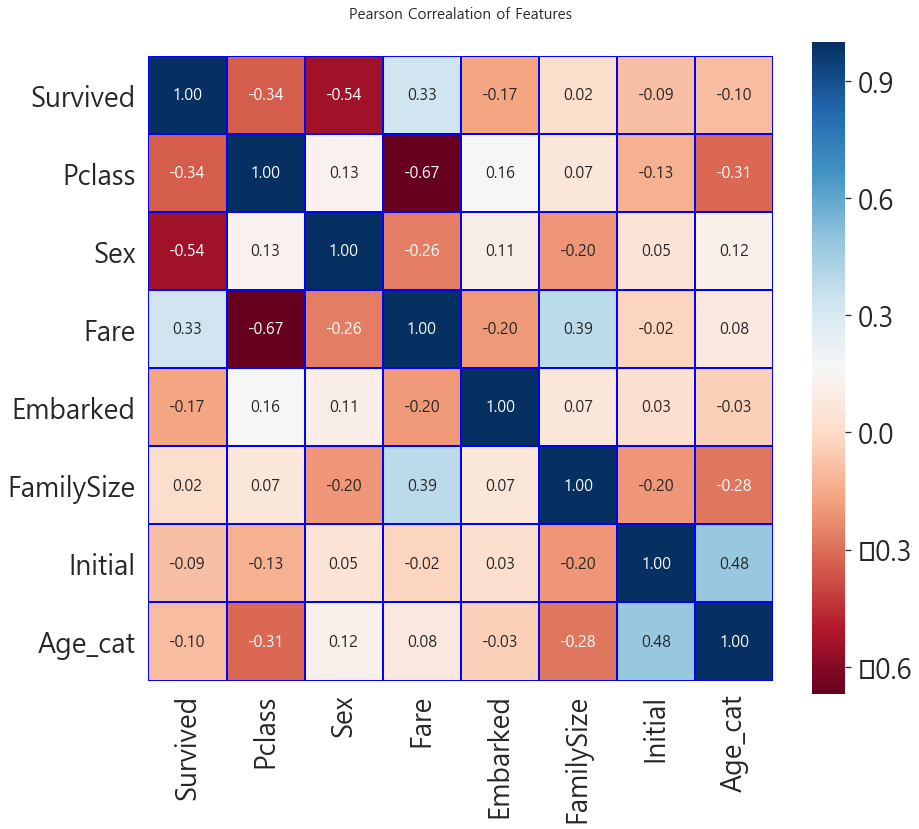

In [63]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=1, vmax=1,
           square=True, cmap=colormap, linecolor='Blue', annot=True, annot_kws={'size': 16}, fmt='.2f')

# 원핫 인코딩

In [64]:
train = pd.get_dummies(train, columns=['Initial'], prefix='Initial') # 이요한님의 방법
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
train = pd.get_dummies(train, columns=['Pclass'], prefix='Pclass')
test = pd.get_dummies(test, columns=['Initial'], prefix='Initial')
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')
test = pd.get_dummies(test, columns=['Pclass'], prefix='Pclass')

## 필요없는 데이터 드랍

In [65]:
train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis= 1, inplace=True)
test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis= 1, inplace=True)

In [66]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [69]:
train.isnull().sum()
test.isnull().sum()

Sex           0
Age           0
Fare          0
FamilySize    0
Age_cat       0
Initial_0     0
Initial_1     0
Initial_2     0
Initial_3     0
Initial_4     0
Embarked_0    0
Embarked_1    0
Embarked_2    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

# Fare 결측치 제거

In [71]:
# test.loc[test.isnull()['Fare'], :]
# test[test['Fare'].isnull()]
# test['Fare'].mean()
test.fillna(value=36, inplace=True) # 평균값을 반올림 해서 채워넣는다.

35.62808038277509

## 잘못된 사례
### Pclass, Embarked, Initial, Sex 
### 4개를 원핫인코딩 진행


In [69]:
# P = train['Pclass']; E = train["Embarked"]; I = train["Initial"]
# P_t = test['Pclass']; E_t = test["Embarked"]; I_t = test["Initial"]

# 잘못된 One-hot Encoding 

In [70]:
# # train의 Pclass 원핫인코딩
# e = LabelEncoder()
# P_1 = e.fit_transform(P)
# P_1encoded = np_utils.to_categorical(P_1)
# train['Pclass'] = P_1encoded.tolist()

# # train의 Embarked 원핫인코딩
# E_1 = e.fit_transform(E)
# E_1encoded = np_utils.to_categorical(E_1)
# train['Embarked'] = E_1encoded.tolist()

# # train의 Initial 원핫인코딩
# I_1 = e.fit_transform(I)
# I_1encoded = np_utils.to_categorical(I_1)
# train['Initial'] = I_1encoded.tolist()

# # test의 Pclass 원핫인코딩
# P_t_1 = e.fit_transform(P_t)
# P_t_1encoded = np_utils.to_categorical(P_t_1)
# test['Pclass'] = P_t_1encoded.tolist()

# # test의 Embarked 원핫인코딩
# E_t_1 = e.fit_transform(E_t)
# E_t_1encoded = np_utils.to_categorical(E_t_1)
# test['Embarked'] = E_t_1encoded.tolist()

# # test의 Initial 원핫인코딩
# I_t_1 = e.fit_transform(I_t)
# I_t_1encoded = np_utils.to_categorical(I_t_1)
# test['Initial'] = I_t_1encoded.tolist()

# 머신러닝 

## 랜덤 포레스트

In [72]:
# train.to_csv("./DATA/clean_train.csv")
# test.to_csv("./DATA/clean_test.csv")
train = pd.read_csv('./DATA/clean_train.csv', index_col=0) # 위 전처리한 결과를 csv로 저장한것을 다시불러옴
test = pd.read_csv('./DATA/clean_test.csv', index_col=0)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [76]:
X_train = train.drop('Survived', axis=1).values
target_label = train['Survived'].values
X_test = test.values

In [77]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, target_label, test_size=0.3, random_state=2019)

In [78]:
# X_train.shape
# X_test.shape

In [79]:
Forest = RandomForestClassifier()
Forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
prediction = Forest.predict(X_valid)

In [88]:
prediction # validation 데이터에 대한 예측값

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0], dtype=int64)

In [156]:
Forest.feature_importances_


array([0.09680608, 0.16869949, 0.26203776, 0.0922543 , 0.05621762,
       0.01084968, 0.03419187, 0.13115435, 0.00577929, 0.00950304,
       0.01054498, 0.0056772 , 0.01581309, 0.02411958, 0.03145556,
       0.04489612])

# Feature importance

In [172]:
from pandas import Series

feature_importance = Forest.feature_importances_
Series_feat_imp = Series(feature_importance, index=test.columns)

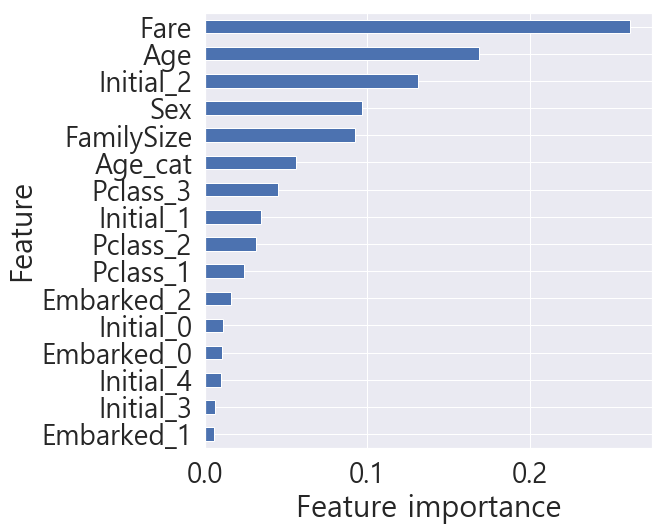

In [173]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

###### validation data에 대한 정확도

In [81]:
print('총 {}명 중 {:.2f}% 정확도로 생존자 맞춤'.format(y_valid.shape[0], 100 * metrics.accuracy_score(prediction,y_valid)))

총 268명 중 80.60% 정확도로 생존자 맞춤


# 캐글에 제출해보기

In [113]:
submission = pd.read_csv('./DATA/gender_submission.csv')

In [114]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [93]:
prediction = Forest.predict(X_test) # 테스트 데이터에 대한 예측
# X_test[0]
# X_train[0]
# X_test.insull()

In [116]:
submission['Survived'] = prediction

In [118]:
submission.to_csv('./my_submisiion.csv', index=False)

# 케라스

In [82]:
from keras.models import Sequential
from keras.layers import Dense

In [83]:
model = Sequential()
model.add(Dense(128, input_dim=16, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

W1030 12:43:56.350460 11976 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1030 12:43:56.378360 11976 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1030 12:43:56.385367 11976 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [84]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W1030 12:43:58.726287 11976 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1030 12:43:58.740251 11976 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W1030 12:43:58.743243 11976 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [85]:
X_train.shape

(623, 16)

In [86]:
model.fit(X_train, y_train, epochs = 50, batch_size=10)

W1030 12:44:02.461117 11976 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
623/623 [==============================] - 0s 556us/step - loss: 0.6115 - acc: 0.6998
Epoch 2/50
623/623 [==============================] - 0s 83us/step - loss: 0.5003 - acc: 0.7689
Epoch 3/50
623/623 [==============================] - 0s 90us/step - loss: 0.4626 - acc: 0.7881
Epoch 4/50
623/623 [==============================] - 0s 93us/step - loss: 0.4487 - acc: 0.7978
Epoch 5/50
623/623 [==============================] - 0s 78us/step - loss: 0.4438 - acc: 0.8154
Epoch 6/50
623/623 [==============================] - 0s 83us/step - loss: 0.4428 - acc: 0.8074
Epoch 7/50
623/623 [==============================] - 0s 88us/step - loss: 0.4264 - acc: 0.8283
Epoch 8/50
623/623 [==============================] - 0s 98us/step - loss: 0.4229 - acc: 0.8186
Epoch 9/50
623/623 [==============================] - 0s 93us/step - loss: 0.4506 - acc: 0.8010
Epoch 10/50
623/623 [==============================] - 0s 115us/step - loss: 0.4314 - acc: 0.8138
Epoch 11/50
623/623 [================

### 추측컨대 softmax를 통해 나온값을 제출해야 되나보다
##### 이상태로 제출하면 오류가남

In [112]:
prediction_keras = model.predict(X_test)

In [164]:
submission['Survived'] = prediction_keras

In [166]:
submission.to_csv("./keras_submission.csv", index=False)

# XG 부스트

In [87]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import time
xgb_clf = XGBClassifier(n_estimators=200, random_state=156)

startTime = time.time()

In [88]:
xgb_clf.fit(X_train, y_train, early_stopping_rounds=10,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_valid, y_valid)])

[0]	validation_0-auc:0.865818	validation_1-auc:0.835876
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.86585	validation_1-auc:0.835999
[2]	validation_0-auc:0.885249	validation_1-auc:0.841002
[3]	validation_0-auc:0.885046	validation_1-auc:0.841558
[4]	validation_0-auc:0.891137	validation_1-auc:0.848011
[5]	validation_0-auc:0.89422	validation_1-auc:0.850698
[6]	validation_0-auc:0.897458	validation_1-auc:0.856905
[7]	validation_0-auc:0.898198	validation_1-auc:0.858696
[8]	validation_0-auc:0.898987	validation_1-auc:0.860703
[9]	validation_0-auc:0.900247	validation_1-auc:0.861907
[10]	validation_0-auc:0.90015	validation_1-auc:0.862339
[11]	validation_0-auc:0.899566	validation_1-auc:0.863883
[12]	validation_0-auc:0.899887	validation_1-auc:0.864625
[13]	validation_0-auc:0.899887	validation_1-auc:0.864872
[14]	validation_0-auc:0.899716	validation_1-auc:0.866724
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=156, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [89]:
xgb_clf.predict_proba(X_valid)[:,1]

array([0.19892074, 0.39516705, 0.23368995, 0.54863375, 0.18666694,
       0.9111975 , 0.10342389, 0.9089001 , 0.1294644 , 0.10828128,
       0.18666694, 0.14799823, 0.10828128, 0.18666694, 0.17252694,
       0.10342389, 0.5708876 , 0.9052128 , 0.14730212, 0.91847944,
       0.6635301 , 0.10828128, 0.8014861 , 0.18352745, 0.91636676,
       0.6635301 , 0.39516705, 0.53985804, 0.52264434, 0.17593504,
       0.8014861 , 0.15461126, 0.91847944, 0.23081712, 0.13344589,
       0.91847944, 0.91636676, 0.11393943, 0.17650634, 0.10566472,
       0.5341955 , 0.74114907, 0.15461126, 0.1409496 , 0.10340448,
       0.8341367 , 0.12338832, 0.52264434, 0.12338832, 0.1552306 ,
       0.9271844 , 0.12395856, 0.52264434, 0.74114907, 0.19622734,
       0.16447468, 0.91636676, 0.9111975 , 0.13608938, 0.35307756,
       0.23569073, 0.13608938, 0.14088808, 0.13344589, 0.12374409,
       0.35307756, 0.1552306 , 0.48246083, 0.90954083, 0.10342389,
       0.39516705, 0.5798906 , 0.16609244, 0.13608938, 0.14799

In [90]:
xgb_clf.fit(X_train, y_train, early_stopping_rounds=10,
            eval_metric="auc", eval_set=[(X_train, y_train),(X_valid, y_valid)])

xgb_roc_score = roc_auc_score(y_valid, xgb_clf.predict_proba(X_valid)[:,1])
print('ROC AUC: {0:4f}'.format(xgb_roc_score))
pred_test = pd.DataFrame(test.index)

[0]	validation_0-auc:0.865818	validation_1-auc:0.835876
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.86585	validation_1-auc:0.835999
[2]	validation_0-auc:0.885249	validation_1-auc:0.841002
[3]	validation_0-auc:0.885046	validation_1-auc:0.841558
[4]	validation_0-auc:0.891137	validation_1-auc:0.848011
[5]	validation_0-auc:0.89422	validation_1-auc:0.850698
[6]	validation_0-auc:0.897458	validation_1-auc:0.856905
[7]	validation_0-auc:0.898198	validation_1-auc:0.858696
[8]	validation_0-auc:0.898987	validation_1-auc:0.860703
[9]	validation_0-auc:0.900247	validation_1-auc:0.861907
[10]	validation_0-auc:0.90015	validation_1-auc:0.862339
[11]	validation_0-auc:0.899566	validation_1-auc:0.863883
[12]	validation_0-auc:0.899887	validation_1-auc:0.864625
[13]	validation_0-auc:0.899887	validation_1-auc:0.864872
[14]	validation_0-auc:0.899716	validation_1-auc:0.866724
[

In [95]:
#하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해
#n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7], 'min_child_weight':[1,3],'colsample_bytree':[0.5, 0.75]}

In [96]:
from sklearn.model_selection import GridSearchCV
#하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv를 지정하지 않음
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30,
          eval_metric="auc", eval_set=[(X_train, y_train), (X_valid, y_valid)])

[0]	validation_0-auc:0.87748	validation_1-auc:0.810277
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.879887	validation_1-auc:0.826025
[2]	validation_0-auc:0.887072	validation_1-auc:0.849617
[3]	validation_0-auc:0.889051	validation_1-auc:0.84798
[4]	validation_0-auc:0.896751	validation_1-auc:0.844275
[5]	validation_0-auc:0.903078	validation_1-auc:0.85499
[6]	validation_0-auc:0.904826	validation_1-auc:0.858202
[7]	validation_0-auc:0.904649	validation_1-auc:0.856843
[8]	validation_0-auc:0.906847	validation_1-auc:0.856164
[9]	validation_0-auc:0.910659	validation_1-auc:0.862309
[10]	validation_0-auc:0.910836	validation_1-auc:0.862062
[11]	validation_0-auc:0.915051	validation_1-auc:0.86518
[12]	validation_0-auc:0.916193	validation_1-auc:0.862679
[13]	validation_0-auc:0.918059	validation_1-auc:0.860518
[14]	validation_0-auc:0.918906	validation_1-auc:0.858047
[1

[5]	validation_0-auc:0.893925	validation_1-auc:0.844182
[6]	validation_0-auc:0.89371	validation_1-auc:0.848197
[7]	validation_0-auc:0.894981	validation_1-auc:0.846745
[8]	validation_0-auc:0.898231	validation_1-auc:0.846282
[9]	validation_0-auc:0.90037	validation_1-auc:0.847456
[10]	validation_0-auc:0.900488	validation_1-auc:0.84727
[11]	validation_0-auc:0.902247	validation_1-auc:0.844491
[12]	validation_0-auc:0.901592	validation_1-auc:0.84622
[13]	validation_0-auc:0.902681	validation_1-auc:0.843194
[14]	validation_0-auc:0.90282	validation_1-auc:0.843997
[15]	validation_0-auc:0.906627	validation_1-auc:0.84375
[16]	validation_0-auc:0.907989	validation_1-auc:0.845047
[17]	validation_0-auc:0.910568	validation_1-auc:0.844954
[18]	validation_0-auc:0.91118	validation_1-auc:0.847178
[19]	validation_0-auc:0.911619	validation_1-auc:0.845881
[20]	validation_0-auc:0.912729	validation_1-auc:0.845819
[21]	validation_0-auc:0.912879	validation_1-auc:0.844831
[22]	validation_0-auc:0.912686	validation_1

[35]	validation_0-auc:0.918359	validation_1-auc:0.871943
[36]	validation_0-auc:0.918853	validation_1-auc:0.872684
[37]	validation_0-auc:0.918949	validation_1-auc:0.872375
[38]	validation_0-auc:0.919635	validation_1-auc:0.872622
[39]	validation_0-auc:0.919571	validation_1-auc:0.871572
[40]	validation_0-auc:0.920391	validation_1-auc:0.87361
[41]	validation_0-auc:0.920681	validation_1-auc:0.874475
[42]	validation_0-auc:0.921115	validation_1-auc:0.874444
[43]	validation_0-auc:0.920987	validation_1-auc:0.875124
[44]	validation_0-auc:0.920686	validation_1-auc:0.875
[45]	validation_0-auc:0.921282	validation_1-auc:0.874166
[46]	validation_0-auc:0.921528	validation_1-auc:0.873981
[47]	validation_0-auc:0.921775	validation_1-auc:0.875401
[48]	validation_0-auc:0.921678	validation_1-auc:0.875772
[49]	validation_0-auc:0.921839	validation_1-auc:0.875031
[50]	validation_0-auc:0.921764	validation_1-auc:0.874475
[51]	validation_0-auc:0.922225	validation_1-auc:0.874352
[52]	validation_0-auc:0.922493	vali

[33]	validation_0-auc:0.942799	validation_1-auc:0.875741
[34]	validation_0-auc:0.943056	validation_1-auc:0.875803
[35]	validation_0-auc:0.943694	validation_1-auc:0.875062
[36]	validation_0-auc:0.944284	validation_1-auc:0.875618
[37]	validation_0-auc:0.944638	validation_1-auc:0.87605
[38]	validation_0-auc:0.944906	validation_1-auc:0.876915
[39]	validation_0-auc:0.945088	validation_1-auc:0.876667
[40]	validation_0-auc:0.945142	validation_1-auc:0.8771
[41]	validation_0-auc:0.945448	validation_1-auc:0.877841
[42]	validation_0-auc:0.946134	validation_1-auc:0.876884
[43]	validation_0-auc:0.947024	validation_1-auc:0.877316
[44]	validation_0-auc:0.94682	validation_1-auc:0.87676
[45]	validation_0-auc:0.947131	validation_1-auc:0.876884
[46]	validation_0-auc:0.9477	validation_1-auc:0.876451
[47]	validation_0-auc:0.947914	validation_1-auc:0.876822
[48]	validation_0-auc:0.947828	validation_1-auc:0.876143
[49]	validation_0-auc:0.947968	validation_1-auc:0.87639
[50]	validation_0-auc:0.948268	validati

[26]	validation_0-auc:0.922016	validation_1-auc:0.842546
[27]	validation_0-auc:0.923324	validation_1-auc:0.842793
[28]	validation_0-auc:0.923319	validation_1-auc:0.842978
[29]	validation_0-auc:0.922933	validation_1-auc:0.843287
[30]	validation_0-auc:0.924649	validation_1-auc:0.842237
[31]	validation_0-auc:0.926193	validation_1-auc:0.842299
[32]	validation_0-auc:0.92748	validation_1-auc:0.840878
[33]	validation_0-auc:0.927534	validation_1-auc:0.841063
[34]	validation_0-auc:0.927244	validation_1-auc:0.841187
[35]	validation_0-auc:0.928542	validation_1-auc:0.840322
[36]	validation_0-auc:0.929389	validation_1-auc:0.840384
Stopping. Best iteration:
[6]	validation_0-auc:0.895871	validation_1-auc:0.845263

[0]	validation_0-auc:0.875844	validation_1-auc:0.806849
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.868735	validation_1-auc:0.805367
[2]	validation_0-auc:0

[52]	validation_0-auc:0.925319	validation_1-auc:0.881824
[53]	validation_0-auc:0.925705	validation_1-auc:0.881392
[54]	validation_0-auc:0.926054	validation_1-auc:0.881361
[55]	validation_0-auc:0.927083	validation_1-auc:0.881423
[56]	validation_0-auc:0.927008	validation_1-auc:0.880929
[57]	validation_0-auc:0.927051	validation_1-auc:0.881299
[58]	validation_0-auc:0.927147	validation_1-auc:0.881052
[59]	validation_0-auc:0.927469	validation_1-auc:0.881114
[60]	validation_0-auc:0.927426	validation_1-auc:0.881732
[61]	validation_0-auc:0.927362	validation_1-auc:0.881114
[62]	validation_0-auc:0.927416	validation_1-auc:0.880929
[63]	validation_0-auc:0.927437	validation_1-auc:0.880497
[64]	validation_0-auc:0.927534	validation_1-auc:0.881546
[65]	validation_0-auc:0.92808	validation_1-auc:0.882226
[66]	validation_0-auc:0.928627	validation_1-auc:0.882874
[67]	validation_0-auc:0.928767	validation_1-auc:0.882627
[68]	validation_0-auc:0.929249	validation_1-auc:0.882257
[69]	validation_0-auc:0.929281	v

[49]	validation_0-auc:0.942584	validation_1-auc:0.872561
[50]	validation_0-auc:0.943056	validation_1-auc:0.872746
[51]	validation_0-auc:0.942938	validation_1-auc:0.872622
Stopping. Best iteration:
[21]	validation_0-auc:0.927893	validation_1-auc:0.876081

[0]	validation_0-auc:0.892493	validation_1-auc:0.837976
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.892322	validation_1-auc:0.842669
[2]	validation_0-auc:0.894815	validation_1-auc:0.845665
[3]	validation_0-auc:0.893866	validation_1-auc:0.852921
[4]	validation_0-auc:0.896987	validation_1-auc:0.853724
[5]	validation_0-auc:0.898316	validation_1-auc:0.854681
[6]	validation_0-auc:0.904542	validation_1-auc:0.86132
[7]	validation_0-auc:0.905008	validation_1-auc:0.861598
[8]	validation_0-auc:0.905651	validation_1-auc:0.86061
[9]	validation_0-auc:0.908279	validation_1-auc:0.862185
[10]	validation_0-auc:0.909973

[36]	validation_0-auc:0.924413	validation_1-auc:0.874753
[37]	validation_0-auc:0.924606	validation_1-auc:0.875741
[38]	validation_0-auc:0.925121	validation_1-auc:0.874938
[39]	validation_0-auc:0.925421	validation_1-auc:0.874382
[40]	validation_0-auc:0.925426	validation_1-auc:0.875463
[41]	validation_0-auc:0.925796	validation_1-auc:0.875494
[42]	validation_0-auc:0.926756	validation_1-auc:0.874629
[43]	validation_0-auc:0.927099	validation_1-auc:0.874444
[44]	validation_0-auc:0.927539	validation_1-auc:0.873394
[45]	validation_0-auc:0.927764	validation_1-auc:0.873209
[46]	validation_0-auc:0.927775	validation_1-auc:0.8729
[47]	validation_0-auc:0.928204	validation_1-auc:0.872777
[48]	validation_0-auc:0.92845	validation_1-auc:0.872499
[49]	validation_0-auc:0.928643	validation_1-auc:0.873024
[50]	validation_0-auc:0.928836	validation_1-auc:0.872036
[51]	validation_0-auc:0.928601	validation_1-auc:0.871665
[52]	validation_0-auc:0.928922	validation_1-auc:0.872097
[53]	validation_0-auc:0.92933	vali

[11]	validation_0-auc:0.928944	validation_1-auc:0.874012
[12]	validation_0-auc:0.92808	validation_1-auc:0.874876
[13]	validation_0-auc:0.929169	validation_1-auc:0.873209
[14]	validation_0-auc:0.930772	validation_1-auc:0.875525
[15]	validation_0-auc:0.930944	validation_1-auc:0.875031
[16]	validation_0-auc:0.932874	validation_1-auc:0.878242
[17]	validation_0-auc:0.933845	validation_1-auc:0.877378
[18]	validation_0-auc:0.935362	validation_1-auc:0.879663
[19]	validation_0-auc:0.935727	validation_1-auc:0.879478
[20]	validation_0-auc:0.936311	validation_1-auc:0.88096
[21]	validation_0-auc:0.937121	validation_1-auc:0.879385
[22]	validation_0-auc:0.937351	validation_1-auc:0.879261
[23]	validation_0-auc:0.937662	validation_1-auc:0.880651
[24]	validation_0-auc:0.937673	validation_1-auc:0.882071
[25]	validation_0-auc:0.938418	validation_1-auc:0.881299
[26]	validation_0-auc:0.938869	validation_1-auc:0.881516
[27]	validation_0-auc:0.939319	validation_1-auc:0.879941
[28]	validation_0-auc:0.939651	va

[37]	validation_0-auc:0.935501	validation_1-auc:0.841805
Stopping. Best iteration:
[7]	validation_0-auc:0.901389	validation_1-auc:0.855453

[0]	validation_0-auc:0.877737	validation_1-auc:0.813797
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.880257	validation_1-auc:0.809134
[2]	validation_0-auc:0.87903	validation_1-auc:0.816144
[3]	validation_0-auc:0.885367	validation_1-auc:0.837883
[4]	validation_0-auc:0.890209	validation_1-auc:0.840847
[5]	validation_0-auc:0.892214	validation_1-auc:0.841249
[6]	validation_0-auc:0.892279	validation_1-auc:0.842083
[7]	validation_0-auc:0.902214	validation_1-auc:0.846251
[8]	validation_0-auc:0.905721	validation_1-auc:0.851285
[9]	validation_0-auc:0.907067	validation_1-auc:0.85428
[10]	validation_0-auc:0.907373	validation_1-auc:0.854373
[11]	validation_0-auc:0.910981	validation_1-auc:0.853755
[12]	validation_0-auc:0.910316	

[65]	validation_0-auc:0.930917	validation_1-auc:0.881793
[66]	validation_0-auc:0.930863	validation_1-auc:0.881361
[67]	validation_0-auc:0.931153	validation_1-auc:0.881979
[68]	validation_0-auc:0.931378	validation_1-auc:0.882349
[69]	validation_0-auc:0.931496	validation_1-auc:0.881608
[70]	validation_0-auc:0.931078	validation_1-auc:0.882102
[71]	validation_0-auc:0.931534	validation_1-auc:0.881701
[72]	validation_0-auc:0.932005	validation_1-auc:0.882133
[73]	validation_0-auc:0.932113	validation_1-auc:0.881824
[74]	validation_0-auc:0.932606	validation_1-auc:0.882874
[75]	validation_0-auc:0.932306	validation_1-auc:0.883183
[76]	validation_0-auc:0.932413	validation_1-auc:0.883399
[77]	validation_0-auc:0.933174	validation_1-auc:0.882843
[78]	validation_0-auc:0.93326	validation_1-auc:0.883399
[79]	validation_0-auc:0.933689	validation_1-auc:0.884017
[80]	validation_0-auc:0.933936	validation_1-auc:0.883708
[81]	validation_0-auc:0.933603	validation_1-auc:0.883646
[82]	validation_0-auc:0.934054	v

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 7], 'min_child_weight': [1, 3], 'colsample_bytree': [0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
print('GridSearchCV 최적 파라미터:',gridcv.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}
